In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [53]:

feature = pd.read_csv("data/features.csv")
stores = pd.read_csv("data/stores.csv")
df_test = pd.read_csv("data/test.csv")
df_train = pd.read_csv("data/train.csv")  
submit = pd.read_csv("data/sampleSubmission.csv")

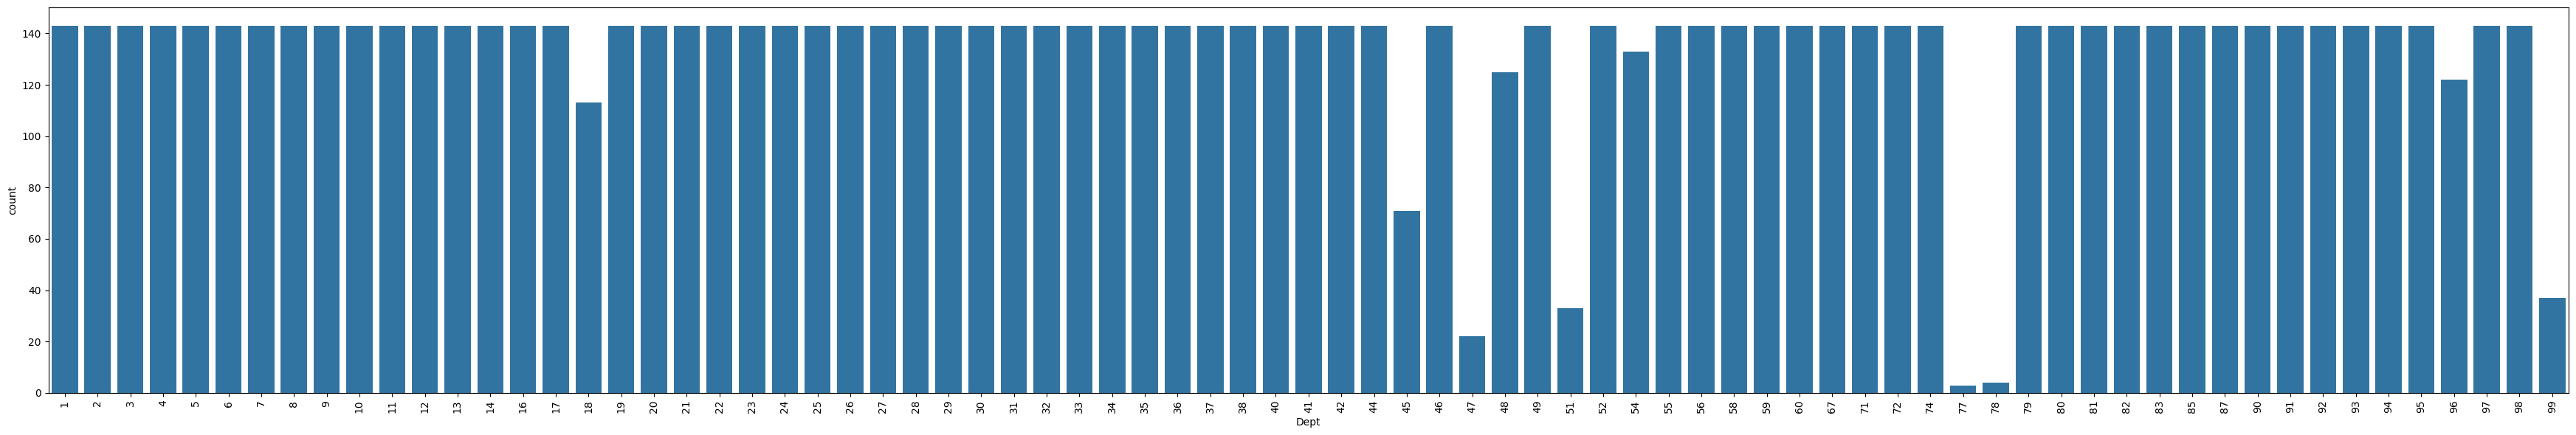

In [54]:
plt.figure(figsize=(35, 6))
sns.countplot(x="Dept", data=df_train[df_train["Store"] == 1])
plt.xticks(rotation=90)
plt.tight_layout()

### Data Availability by Department (Store 1)

**Observation:**
I visualized the number of weekly sales records for each department in Store 1.
- **Consistent Data:** Most departments have around 143 weeks of data, covering the full training period.
- **Sparse Data:** Some departments (e.g., 47, 51, 77) have significantly fewer records.


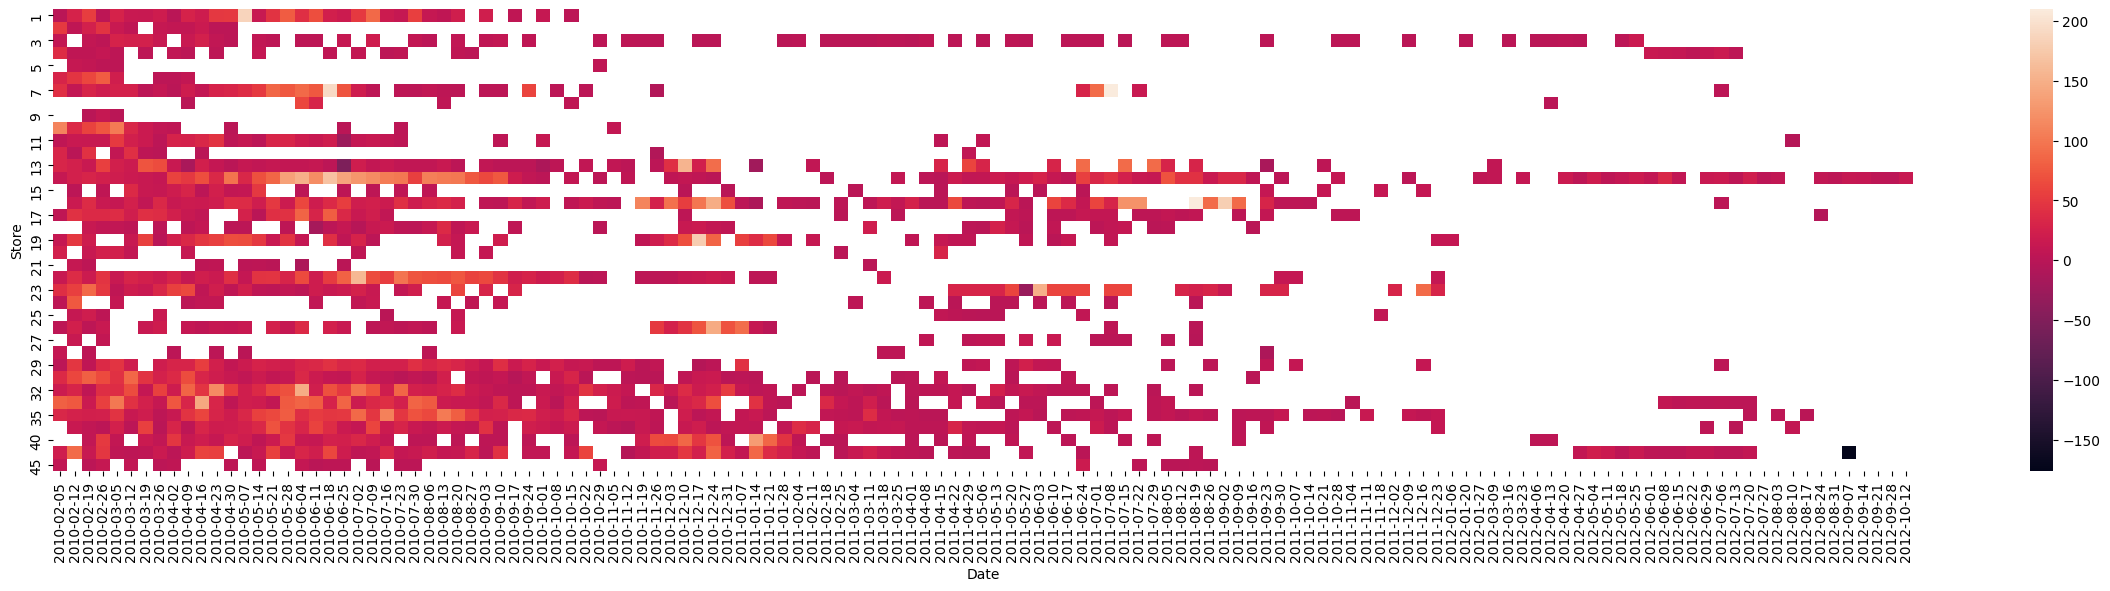

In [55]:
plt.figure(figsize=(30, 6))
sns.heatmap(pd.pivot_table(df_train[df_train["Dept"] == 51], index ="Store", columns = "Date", values = "Weekly_Sales" ))
plt.show()

### Sales Heatmap Analysis (Example: Dept 51)

**Observation:**
I visualized the weekly sales for **Department 51**.
- **Declining Trend:** Sales figures show a downward trend over time.

**Insight:**
- The fading sales activity suggests that **demand for this category might be decreasing**. 

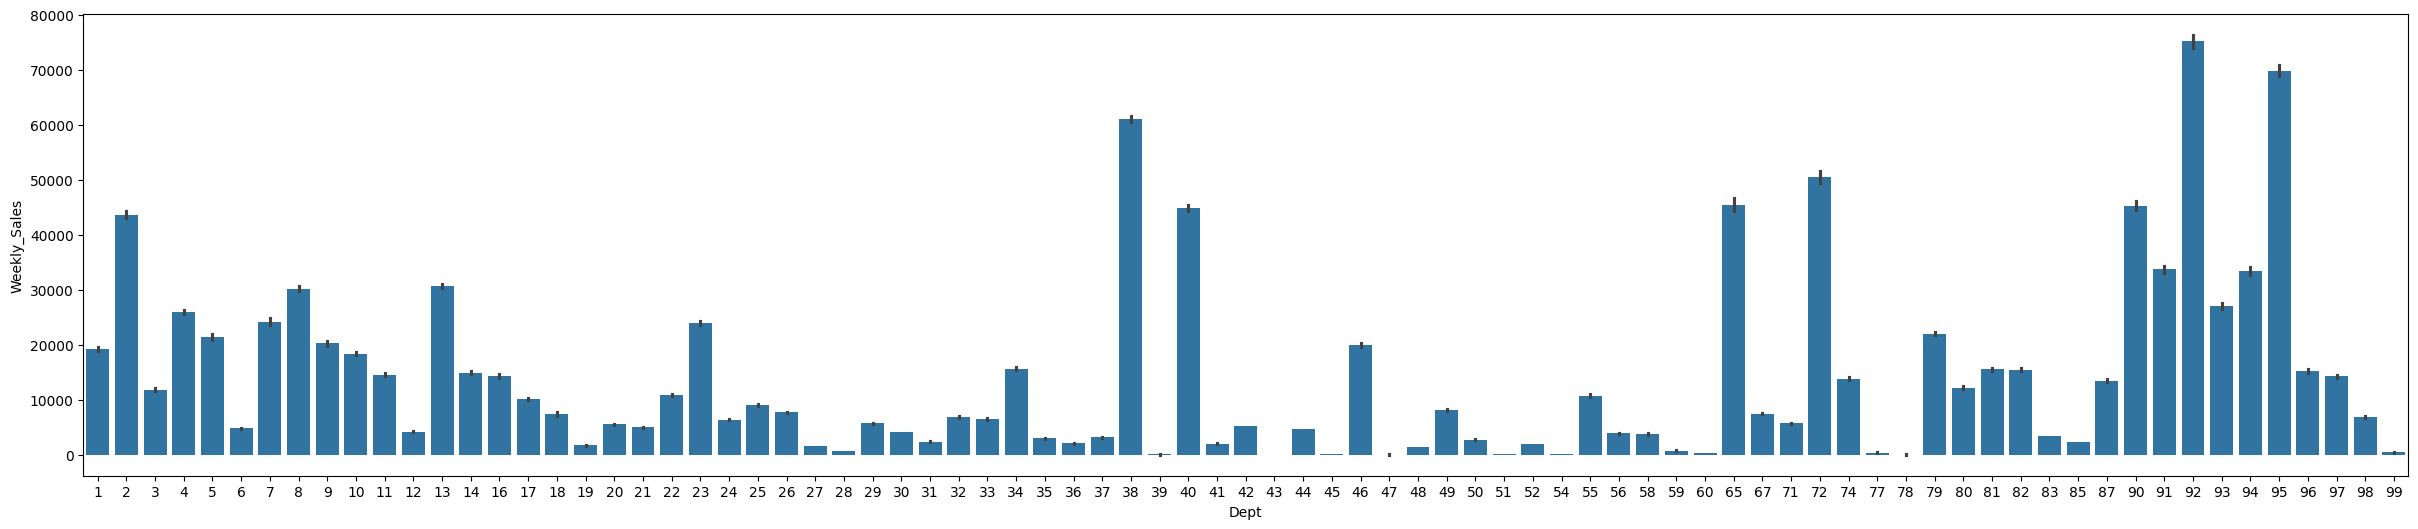

In [56]:
plt.figure(figsize=(30,6))
sns.barplot(x="Dept", y="Weekly_Sales", data=df_train)
plt.show()

### Average Weekly Sales by Department

**Observation:**：I checked which departments make the most money.
- **Huge Gap:** There is a big difference in sales between departments.

**Insight:**
- **Key Takeaway:** Since these few departments drive most of the sales, the model must be accurate for them.

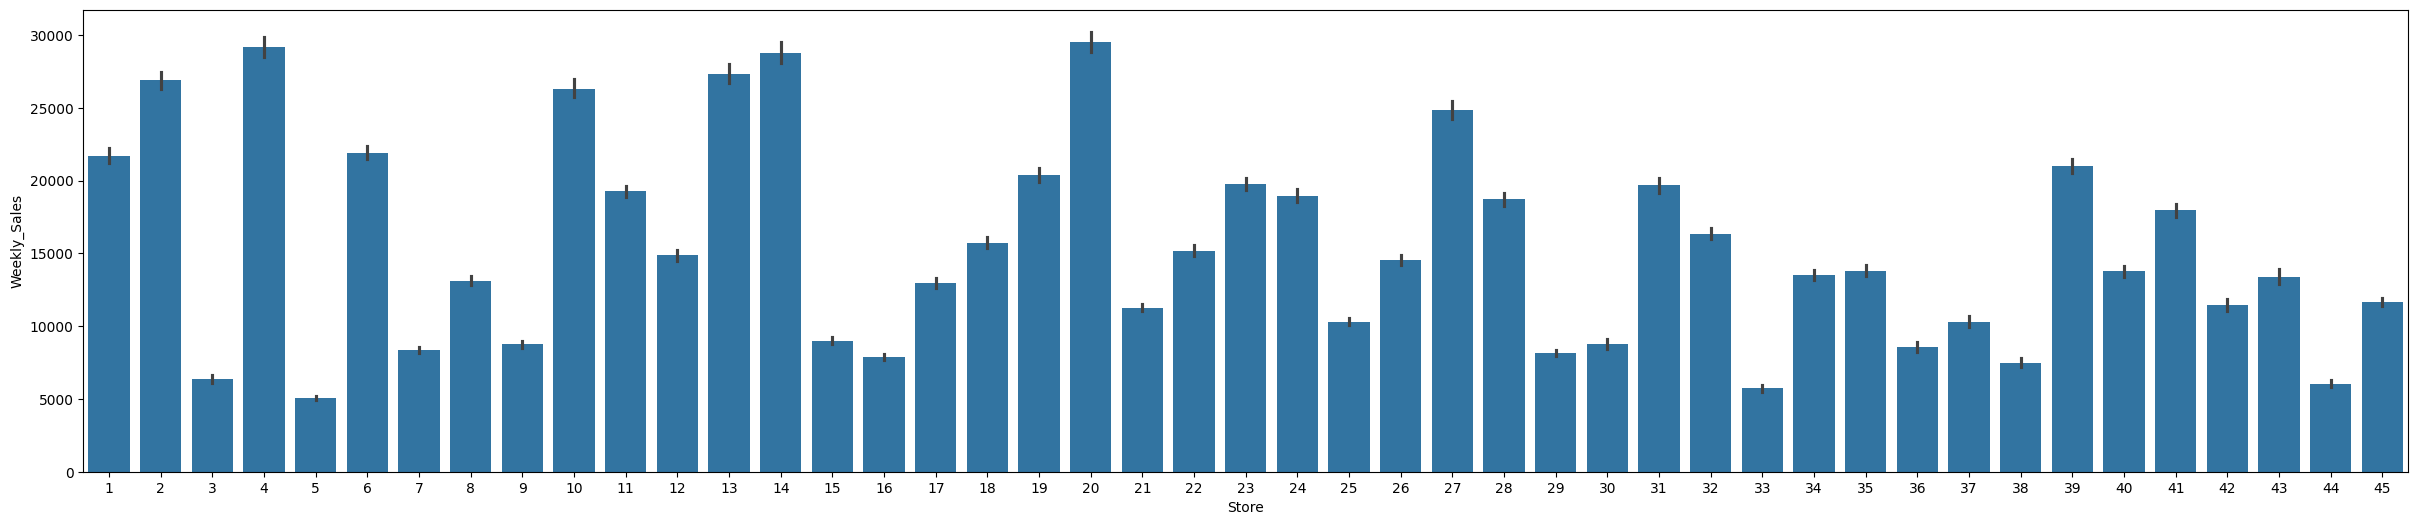

In [57]:
plt.figure(figsize=(30,6))
sns.barplot(x="Store", y="Weekly_Sales", data=df_train)
plt.show()



### Average Sales Analysis by Store

**Observation:**: I visualized the average weekly sales for **all 45 stores**.

* **Significant Variance:** There is a large disparity in sales volume between different stores.


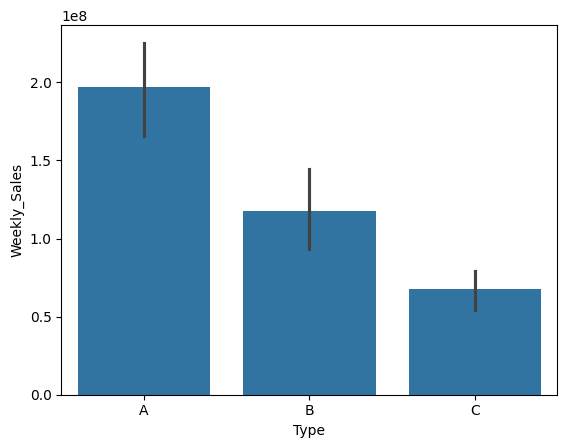

In [58]:
df_tmp = pd.merge(df_train.groupby("Store").sum()[["Weekly_Sales"]].reset_index(), stores)
sns.barplot(x ="Type", y="Weekly_Sales", data=df_tmp) 
plt.show()

### Total Sales Analysis by Store Type

**Observation:** I visualized the total sales volume for each store type (A, B, C).

* **Clear Hierarchy:** Type A stores generate the highest revenue, followed by Type B, while Type C generates the least.

**Insight:**

* **Predictive Power:** The "Type" category is a very strong indicator of sales potential.
* **Store Size:** This suggests Type A likely represents the largest stores (e.g., Supercenters), while Type C represents smaller locations.

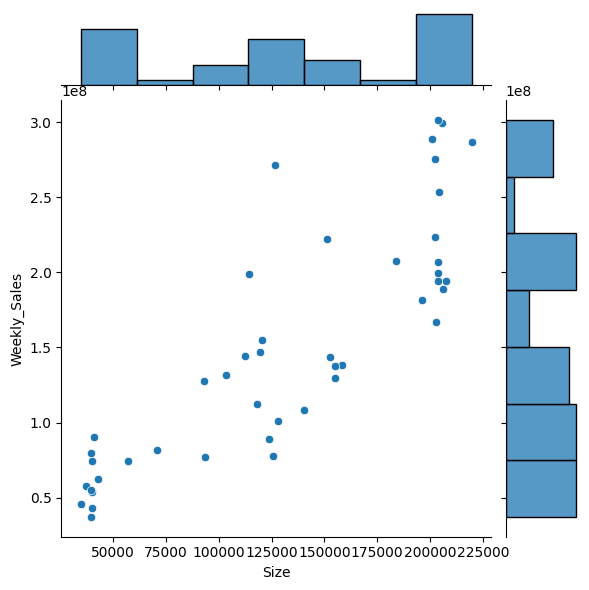

In [59]:
sns.jointplot(x="Size", y="Weekly_Sales", data=df_tmp)
plt.show()

### Size vs. Sales Analysis

**Observation:** I checked the relationship between store size and sales.

* **Positive Trend:** Bigger stores clearly have higher sales.

**Insight:**

* **Key Feature:** Store Size is a strong predictor of revenue and is essential for the model.